In [166]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import math
from scipy import optimize
import scipy.stats as stats
from scipy.stats import norm


# 1 Data Preprocessing

In [167]:
df = pd.read_excel('closing_price.xlsx')
time = df['Bloomberg Ticker']
data = df['AAPL UW Equity']
# time,data

In [168]:
apple_price = data.values
# apple_price

In [169]:
x = [(apple_price[i]-apple_price[i-1])/apple_price[i-1] for i in range(1, apple_price.shape[0])]
# x

In [170]:
learning_set_x = x[:len(x)*3//4]
testing_set_x  = x[len(x)*3//4:]
# len(learning_set_x),len(testing_set_x)

In [171]:
epsilon = np.mean(learning_set_x)
# epsilon

In [172]:
d = ['D' if i < -epsilon else 'U' if i > epsilon else 'H' for i in x]
# d

In [173]:
learning_set = apple_price[:len(apple_price)*3//4]
testing_set  = apple_price[len(apple_price)*3//4:]
# len(learning_set),len(testing_set)

# 2 Cumulative Distribution Function

In [174]:
Ux = sorted([learning_set_x[i] for i in range(len(learning_set_x)-1) if d[i+1] == 'U'])
Dx = sorted([learning_set_x[i] for i in range(len(learning_set_x)-1) if d[i+1] == 'D'])

In [175]:
FU = sorted(Ux)
val, cnt = np.unique(Ux, return_counts=True)
pmf = cnt/len(Ux)
FU_rv_discrete = stats.rv_discrete(name='fs_rv_dist', values=(val, pmf))

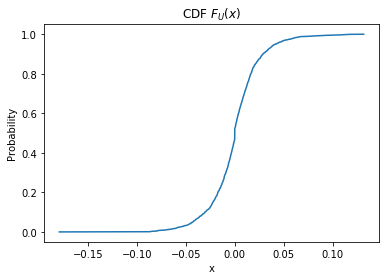

In [177]:
plt.plot(val, FU_rv_discrete.cdf(val), '-')
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('CDF $F_U(x)$')
plt.show()

In [13]:
FD = sorted(Dx)
val, cnt = np.unique(Dx, return_counts=True)
pmf = cnt/len(Dx)
FD_rv_discrete = stats.rv_discrete(name='fs_rv_dist', values=(val, pmf))

Text(0.5, 1.0, 'CDF $F_D(x)$')

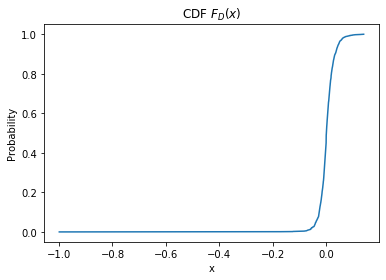

In [14]:
plt.plot(val, FD_rv_discrete.cdf(val), '-')
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('CDF $F_D(x)$')

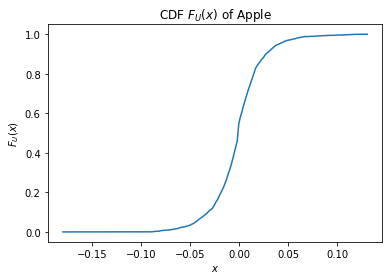

In [178]:
count,low,binsize,_=stats.cumfreq(Ux, numbins=200)
cdf_U_x=[]
cdf_U_x.append(low)
for i in range(1,200):
    cdf_U_x.append(cdf_U_x[i-1]+binsize)
cdf_U=[]
for i in range(200):
    cdf_U.append(count[i]/len(Ux))

# plt.figure(figsize=(12,8))
plt.plot(cdf_U_x,cdf_U)
plt.title('CDF $F_U(x)$ of Apple')
plt.ylabel('$F_U(x)$')
plt.xlabel('$x$')
plt.savefig("FU(x)")
plt.show()

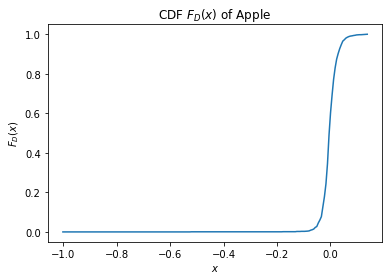

In [179]:
count,low,binsize,_=stats.cumfreq(Dx, numbins=200)
cdf_D_x=[]
cdf_D_x.append(low)
for i in range(1,200):
    cdf_D_x.append(cdf_D_x[i-1]+binsize)
cdf_D=[]
for i in range(200):
    cdf_D.append(count[i]/len(Dx))

# plt.figure(figsize=(12,8))
plt.plot(cdf_D_x,cdf_D)
plt.title('CDF $F_D(x)$ of Apple')
plt.ylabel('$F_D(x)$')
plt.xlabel('$x$')
plt.savefig("FD(x)")
plt.show()

# 3.Probability Density Function

In [180]:
def FD_distribution(x, b, x0):
    return 1/(1+np.exp(-b*(x-x0)))

In [181]:
b_U, x0_U = optimize.curve_fit(FD_distribution, cdf_U_x, cdf_U)[0]
b_D, x0_D = optimize.curve_fit(FD_distribution, cdf_D_x, cdf_D)[0]
# b_U, x0_U, b_D, x0_D

In [182]:
FU_FDFit = [FD_distribution(x, b_U, x0_U) for x in cdf_U_x]
FD_FDFit = [FD_distribution(x, b_D, x0_D) for x in cdf_D_x]

In [183]:
def fD_distribution(x, b, x0):
    return (b*np.exp(-b*(x-x0)))/(1+np.exp(-b*(x-x0)))**2

In [193]:
fU_FDFit = [fD_distribution(x, b_U, x0_U)/len(cdf_U_x) for x in cdf_U_x]
fD_FDFit = [fD_distribution(x, b_D, x0_D)/len(cdf_D_x) for x in cdf_D_x]

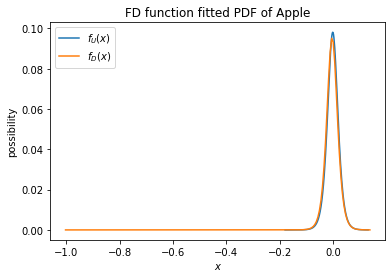

In [194]:
plt.plot(cdf_U_x, fU_FDFit, label="$f_U(x)$")
plt.plot(cdf_D_x, fD_FDFit, label="$f_D(x)$")
plt.title('FD function fitted PDF of Apple')
plt.ylabel('possibility')
plt.xlabel('$x$')
plt.legend()
plt.savefig("f(x) FD fitted")
plt.show()

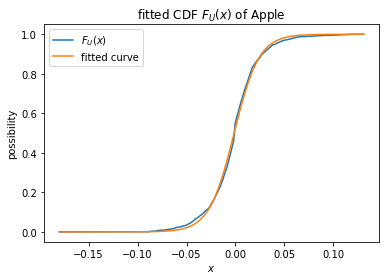

In [195]:
plt.plot(cdf_U_x,cdf_U,label="$F_U(x)$")
plt.plot(cdf_U_x,F_U,label="fitted curve")
plt.title('fitted CDF $F_U(x)$ of Apple')
plt.ylabel('possibility')
plt.xlabel('$x$')
plt.legend()
plt.savefig("FU(x) FD fitted")
plt.show()

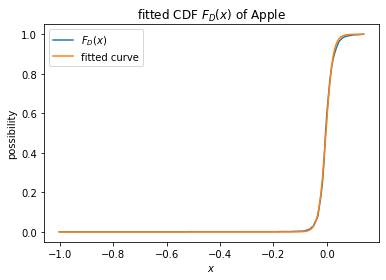

In [196]:
plt.plot(cdf_D_x,cdf_D,label="$F_D(x)$")
plt.plot(cdf_D_x,F_D,label="fitted curve")
plt.title('fitted CDF $F_D(x)$ of Apple')
plt.ylabel('possibility')
plt.xlabel('$x$')
plt.legend()
plt.savefig("FD(x) FD fitted")
plt.show()

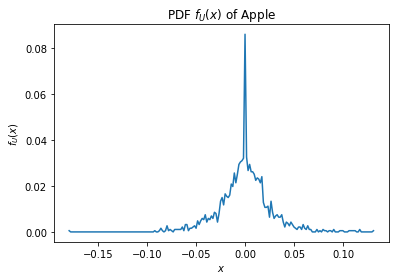

In [197]:
count,low,binsize,_=stats.relfreq(Ux, numbins=200)
pdf_U_x=[]
pdf_U_x.append(low)
for i in range(1,200):
    pdf_U_x.append(pdf_U_x[i-1]+binsize)
pdf_U=[]
for i in range(200):
    pdf_U.append(count[i])

# plt.figure(figsize=(12,8))
plt.plot(pdf_U_x,pdf_U)
plt.title('PDF $f_U(x)$ of Apple')
plt.ylabel('$f_U(x)$')
plt.xlabel('$x$')
plt.savefig("fU(x)")
plt.show()

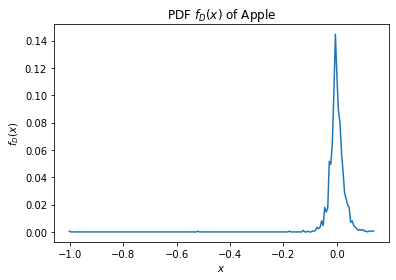

In [198]:
count,low,binsize,_=stats.relfreq(Dx, numbins=200)
pdf_D_x=[]
pdf_D_x.append(low)
for i in range(1,200):
    pdf_D_x.append(pdf_D_x[i-1]+binsize)
pdf_D=[]
for i in range(200):
    pdf_D.append(count[i])

plt.plot(pdf_D_x,pdf_D)
plt.title('PDF $f_D(x)$ of Apple')
plt.ylabel('$f_D(x)$')
plt.xlabel('$x$')
plt.savefig('fD(x)')
plt.show()

In [199]:
def Gaussian_distribution(x, mu, sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)

In [200]:
mean_U = np.mean(Ux)
std_U  = np.sqrt(sum((Ux-mean_U)**2)/len(Ux))

In [201]:
mean_D = np.mean(Dx)
std_D  = np.sqrt(sum((Dx-mean_D)**2)/len(Dx))

In [202]:
mean_U, std_U, mean_D, std_D

(0.00015791983425833504,
 0.026259899575427015,
 0.001900384849612306,
 0.037892759755862794)

In [256]:
gU_GaussianFit = [Gaussian_distribution(x, mean_U, std_U) for x in cdf_U_x]
gD_GaussianFit = [Gaussian_distribution(x, mean_D, std_D) for x in cdf_D_x]
#这里我直接除了g的长度，不清楚你的纵坐标是怎么算的 
#后面我又补了一张我的方法gu和gd在一起的图
# for i in pdf_U_x:
#     f_U.append(Gaussian_distribution(i,0.01, 0.01901651014487778))
# f_D=[]
# for i in pdf_D_x:
#     f_D.append(Gaussian_distribution(i,0.01, 0.0377667340197279))

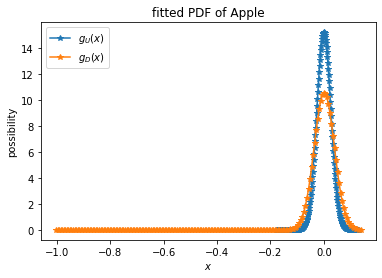

In [257]:
plt.plot(cdf_U_x, gU_GaussianFit,'-*', label="$g_U(x)$")
plt.plot(cdf_D_x, gD_GaussianFit,'-*', label="$g_D(x)$")
plt.title('fitted PDF of Apple')
plt.ylabel('possibility')
plt.xlabel('$x$')
plt.legend()
plt.savefig("f(x) gs fitted.png")
plt.show()

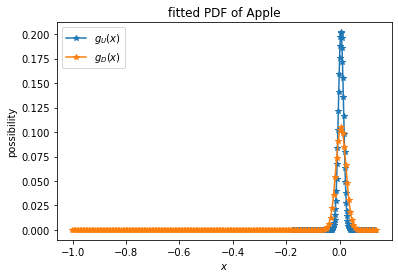

In [252]:
plt.plot(pdf_U_x,f_U,'-*', label="$g_U(x)$")
plt.plot(pdf_D_x,f_D,'-*', label="$g_D(x)$")
plt.title('fitted PDF of Apple')
plt.ylabel('possibility')
plt.xlabel('$x$')
plt.legend()
plt.savefig("f(x) gs fitted.png")
plt.show()

In [208]:
parameters = norm.fit(pdf_U)
f_U = norm.pdf(pdf_U_x, loc = parameters[0], scale = parameters[1])/len(pdf_U_x)
parameters = norm.fit(pdf_D)
f_D = norm.pdf(pdf_D_x, loc = parameters[0], scale = parameters[1])/len(pdf_D_x)

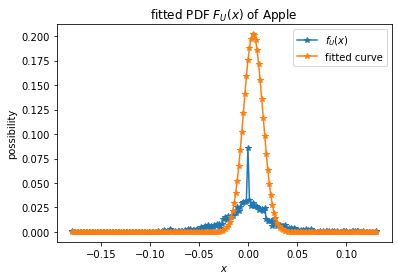

In [253]:
plt.plot(pdf_U_x,pdf_U,'-*',label="$f_U(x)$")
plt.plot(pdf_U_x,f_U,'-*',label="fitted curve")
plt.title('fitted PDF $F_U(x)$ of Apple')
plt.ylabel('possibility')
plt.xlabel('$x$')
plt.legend()
plt.savefig('fU(x) fitted.png')
plt.show()

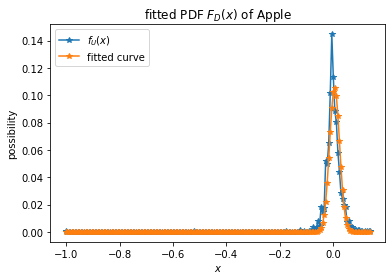

In [254]:
plt.plot(pdf_D_x,pdf_D,'-*',label="$f_U(x)$")
plt.plot(pdf_D_x,f_D,'-*',label="fitted curve")
plt.title('fitted PDF $F_D(x)$ of Apple')
plt.ylabel('possibility')
plt.xlabel('$x$')
plt.legend()
plt.savefig('fD(x) fitted.png')
plt.show()

# 4 Bayes Detector

In [212]:
PU = len(Ux)/len(learning_set_x)
PD = len(Dx)/len(learning_set_x)

In [213]:
cUU, cUD, cDU, cDD = 0, 1, 1, 0
mu = ((cDU-cUU)*PU)/((cUD-cDD)*PD)

In [214]:
def find_cut_point_FD(args):
    x = args[0]
    return [
        ((b_D*np.exp(-b_D*(x-x0_D)))/(1+np.exp(-b_D*(x-x0_D)))**2)/((b_U*np.exp(-b_U*(x-x0_U)))/(1+np.exp(-b_U*(x-x0_U)))**2) - mu
    ]

In [215]:
cut_point_FD = [optimize.fsolve(find_cut_point_FD, [0.1])[0], optimize.fsolve(find_cut_point_FD, [-0.1])[0]]

In [216]:
cut_point_FD

[0.13659818604423596, -0.017125770813066352]

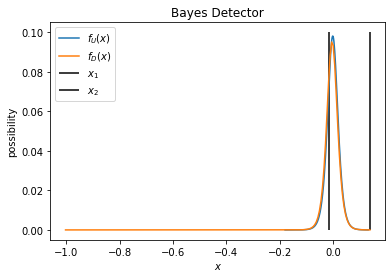

In [228]:
plt.plot(cdf_U_x, fU_FDFit, label="$f_U(x)$")
plt.plot(cdf_D_x, fD_FDFit, label="$f_D(x)$")
plt.vlines(cut_point_FD[0], 0, 0.1, label='$x_1$')
plt.vlines(cut_point_FD[1], 0, 0.1, label='$x_2$')
plt.title('Bayes Detector')
plt.ylabel('possibility')
plt.xlabel('$x$')
plt.legend()
plt.savefig("Bayes1")
plt.show()

In [223]:
def find_cut_point_Gaussian(args):
    x = args[0]
    return [
        (np.exp(-(x-mean_D)**2/(2*std_D**2))/np.sqrt(2*np.pi*std_D**2))/(np.exp(-(x-mean_U)**2/(2*std_U**2))/np.sqrt(2*np.pi*std_U**2)) - mu
    ]

In [224]:
cut_point_Gaussian = [optimize.fsolve(find_cut_point_Gaussian, [0.1])[0], optimize.fsolve(find_cut_point_Gaussian, [-0.1])[0]]

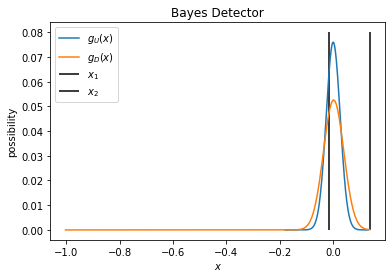

In [230]:
plt.plot(cdf_U_x, gU_GaussianFit, label="$g_U(x)$")
plt.plot(cdf_D_x, gD_GaussianFit, label="$g_D(x)$")
plt.vlines(cut_point_FD[1], 0, 0.08, label='$x_1$')
plt.vlines(cut_point_FD[0], 0, 0.08, label='$x_2$')
plt.title('Bayes Detector')
plt.ylabel('possibility')
plt.xlabel('$x$')
plt.legend()
plt.savefig("Bayes2")
plt.show()

# 5 Association Rules

In [231]:
d_learning = d[:len(d)*3//4]
d_testing  = d[len(d)*3//4:]

#### 1-Day
$$
R^1_U:d(t)\rightarrow d(t+1)=U \\\
R^1_D:d(t)\rightarrow d(t+1)=D
$$
所以我就用一个简单的转移矩阵来算了？

In [241]:
def alphabets(i):
    if i=='U':
        return 0
    if i=='D':
        return 1
    if i=='H':
        return 2
rule1=np.zeros((3,3))
for i in range(len(d_learning)-1):
    rule1[alphabets(d_learning[i])][alphabets(d_learning[i+1])]+=1
print(rule1)

[[860. 854. 156.]
 [841. 741. 139.]
 [169. 126.  25.]]


2 best 1-day rules $R^1_U$ and $R^1_U$ are $U\rightarrow U$ and $U\rightarrow D$

In [249]:
print("rule \t support \t confidence")
print("UU \t "+str((860+854+156)/np.sum(rule1)) +"\t "+str(860/(860+854+156)))
print("UD \t "+str((841+741+139)/np.sum(rule1)) +"\t "+str(854/(841+741+139)))


rule 	 support 	 confidence
UU 	 0.4781385834824853	 0.45989304812834225
UD 	 0.4400409102531322	 0.4962231260894829


#### 5-Day
$$
R^5_U:\{d(t-4),d(t-3),d(t-2),d(t-1),d(t)\}\rightarrow d(t+1)=U \\\
R^5_D:\{d(t-4),d(t-3),d(t-2),d(t-1),d(t)\}\rightarrow d(t+1)=D
$$

In [248]:
rule2=np.zeros((3,3,3,3,3))
count_U=np.zeros((3,3,3,3,3))
count_D=np.zeros((3,3,3,3,3))
for i in range(5,len(d_learning)):
    rule2[alphabets(d_learning[i-5])][alphabets(d_learning[i-4])][alphabets(d_learning[i-3])][alphabets(d_learning[i-2])][alphabets(d_learning[i-1])]+=1
    if d_learning[i]=='U':
        count_U[alphabets(d_learning[i-5])][alphabets(d_learning[i-4])][alphabets(d_learning[i-3])][alphabets(d_learning[i-2])][alphabets(d_learning[i-1])]+=1
    if d_learning[i]=='D':
        count_D[alphabets(d_learning[i-5])][alphabets(d_learning[i-4])][alphabets(d_learning[i-3])][alphabets(d_learning[i-2])][alphabets(d_learning[i-1])]+=1
U_best_value=-float('inf')
D_best_value=-float('inf')
U_best_rule=[0,0,0,0,0]
D_best_rule=[0,0,0,0,0]
for i in range(3):
    for j in range(3):
        for k in range(3):
            for l in range(3):
                for m in range(3):
                    if rule2[i][j][k][l][m]!=0:
                        count_U[i][j][k][l][m]/=rule2[i][j][k][l][m]
                        count_D[i][j][k][l][m]/=rule2[i][j][k][l][m]
                        if count_U[i][j][k][l][m]>=U_best_value and rule2[i][j][k][l][m]>rule2[U_best_rule[0]][U_best_rule[1]][U_best_rule[2]][U_best_rule[3]][U_best_rule[4]]:
                            #因为有一些support很小但confidence很大的，我把它们当成干扰因素，就用了两个限制条件去筛选best rule
                            U_best_rule=[i,j,k,l,m]
                            U_best_value=count_U[i][j][k][l][m]
                        if count_D[i][j][k][l][m]>=D_best_value and rule2[i][j][k][l][m]>rule2[D_best_rule[0]][D_best_rule[1]][D_best_rule[2]][D_best_rule[3]][D_best_rule[4]]:
                            D_best_rule=[i,j,k,l,m]
                            D_best_value=count_D[i][j][k][l][m]
U_best_rule,U_best_value,D_best_rule,D_best_value


([0, 1, 1, 0, 1], 0.5, [1, 1, 0, 1, 0], 0.5)

In [246]:
rule2,count_D,count_U

(array([[[[[ 88.,  72.,  20.],
           [ 87.,  74.,  12.],
           [ 25.,  16.,   4.]],
 
          [[ 78.,  76.,  15.],
           [ 91.,  68.,  22.],
           [ 14.,  12.,   4.]],
 
          [[ 21.,  21.,   3.],
           [ 18.,  12.,   1.],
           [  3.,   3.,   0.]]],
 
 
         [[[ 82.,  85.,  16.],
           [ 81.,  78.,  20.],
           [ 17.,  15.,   3.]],
 
          [[ 80.,  92.,  13.],
           [ 91.,  64.,  10.],
           [ 23.,  15.,   3.]],
 
          [[ 16.,  12.,   3.],
           [ 13.,  15.,   3.],
           [  4.,   0.,   0.]]],
 
 
         [[[ 23.,  15.,   2.],
           [ 19.,  17.,   2.],
           [  3.,   1.,   2.]],
 
          [[ 15.,  12.,   2.],
           [ 15.,  11.,   1.],
           [  1.,   0.,   0.]],
 
          [[  5.,   3.,   0.],
           [  4.,   1.,   0.],
           [  0.,   0.,   1.]]]],
 
 
 
        [[[[ 71.,  82.,  17.],
           [ 67.,  88.,  18.],
           [ 18.,  12.,   2.]],
 
          [[ 93.,  88.,  15.

In [250]:
print("rule \t support \t confidence")
print("UU \t "+str((rule2[U_best_rule[0]][U_best_rule[1]][U_best_rule[2]][U_best_rule[3]][U_best_rule[4]])/np.sum(rule2)) +"\t "+str(U_best_value))
print("UD \t "+str((rule2[D_best_rule[0]][D_best_rule[1]][D_best_rule[2]][D_best_rule[3]][D_best_rule[4]])/np.sum(rule1)) +"\t "+str(D_best_value))


rule 	 support 	 confidence
UU 	 0.02354747888405426	 0.5
UD 	 0.026080286371771927	 0.5
